idea what the data could look like
(17890902, {'nom': 'Conseils Generaux', 'ville': 'versaille', 'sequenceHistorique': ''})
(timestamp1, {'a':False, 'b':False, 'c':False}),
(timestamp2, {'a':False, 'b':True, 'c':False}),
(timestamp3, {'a':False, 'b':False, 'c':False}), 
(timestamp4, {'a':False, 'b':True, 'c':False}),
https://stackoverflow.com/questions/38465620/looking-for-an-efficient-way-to-store-history-data

### 1) RECUPERATION DU CONTENU DE LA PAGE WIKIPEDIA <br>
https://fr.wikipedia.org/wiki/Chronologie_de_la_R%C3%A9volution_fran%C3%A7aise <br>

In [1]:
#Requête
# Importer les modules nécessaires
import requests

# Récupérer l'Url
r = requests.get("https://fr.wikipedia.org/wiki/Chronologie_de_la_R%C3%A9volution_fran%C3%A7aise")

# Enregistrer le contenu dans un fichier
with open("response.html", "w") as f:
    f.write(r.text)
    f.close() 


In [2]:
#La soupe
# Importer les modules nécessaires
from bs4 import BeautifulSoup
import json

# Lire le fichier contenant le contenu
with open("response.html", "r") as f:
 
# Parser l'html pour récupérer les <h2>, <h3> et <li> visés
    soup = BeautifulSoup(f, 'html.parser')

periode = []
annee = []
dateEtEvenement = []
dates = soup.find(class_="mw-body-content").find_all("li", class_=False)
for date in dates:
    if date.find_previous("h3") == None:
        periode.append(date.find_previous("h2").text)
        annee.append(0)
        dateEtEvenement.append(date.text)
    else:
        periode.append(date.find_previous("h2").text)
        annee.append(date.find_previous("h3").text)
        dateEtEvenement.append(date.text)

# Sauvegarder les fichiers
with open("periode.json", "w") as f:
    json.dump(periode, f)
    f.close() 
with open("annee.json", "w") as f:
    json.dump(annee, f)
    f.close() 
with open("dateEtEvenement.json", "w") as f:
    json.dump(dateEtEvenement, f)
    f.close() 

### 2) NETTOYAGE DES DONNEES <br>

In [26]:
#Nettoyage de donnée
# Importer les modules nécessaires
import pandas as pd
import numpy as np
import dateparser
import json

# Lire les jsons et récupérer les listes
with open("periode.json", "r") as f:
    periode = json.load(f)
with open("annee.json", "r") as f:
    annee = json.load(f)
with open("dateEtEvenement.json", "r") as f:
    dateEtEvenement = json.load(f)
    
# Construire le dataframe 
df = pd.DataFrame ({'Période': periode, 'Année': annee, 'dateEtEvenement': dateEtEvenement})

# Processus de récupération du datetime
df[["date","Evenement"]] = df["dateEtEvenement"].str.split(":", n = 1, expand = True)

df["Année"] = df["Année"].replace(0, "1788")

df["datetime"] = df["date"].astype('str') + " " + df["Année"].astype('str')

df["datetimeParse"] = df["datetime"].apply(dateparser.parse)
df["datetimeParse"] = pd.to_datetime(df["datetimeParse"])

df["level"] = [np.random.randint(-15,-2) if (i%4)==0 else np.random.randint(2,15) for i in range(len(df))]

df2 = df.head(20)
df2 = df2[["datetimeParse", "Evenement", "level"]]
print(df2)

#print(df["Evenement"].value_counts(ascending=True))
#print(df.info())

   datetimeParse                                          Evenement  level
0     1788-06-07   « Journée des Tuiles » à Grenoble. Les Grenob...     -7
1     1788-06-14   Les notables grenoblois se réunissent à l'Hôt...     11
2     1788-07-21   Réunion des états généraux du Dauphiné à Vizi...      9
3     1788-08-08   décision de convoquer les États généraux pris...     11
4     1788-08-25   Brienne démissionne. Il est remplacé par Jacq...     -8
5     1788-12-27   Necker, préparant les États généraux, accepte...      3
6     1788-12-29   Marseille réclame l’augmentation du nombre de...      3
7     1789-05-05   ouverture des États généraux à Versailles dan...     10
8     1789-06-20   serment du Jeu de paume par les 576 députés e...    -10
9     1789-07-01   par ordre du Roi, des troupes se rassemblent ...     10
10    1789-07-14                              prise de la Bastille.      9
11    1789-08-04     abolition des privilèges et du système féodal.     14
12    1789-08-26   déclar

In [ ]:
"""
# Récupérer les index à supprimer
toDrop = df.loc[(df['Période'] == 'Notes et références') | (df['Période'] == 'Voir aussi')].index
df2 = df.drop(toDrop)
#print(df2.head(10))
#print(df2.tail(10))
#print(df2.dtypes)
#print(df2.describe())
#print(df2.info())

df2 = df2.drop([df2.index[193]                                    
,df2.index[194]                     
,df2.index[319]                            
,df2.index[320]                               
,df2.index[454]  
,df2.index[489]           
,df2.index[502]                       
,df2.index[504]])

#print(df2)
"""
"""
toDrop = df2.loc[(df2['dateEtEvenement'].str.contains('Liste'))].index
df2 = df2.drop(toDrop)
#print(df2.head(10))
#print(df2.tail(10))
#print(df2.dtypes)
#print(df3.describe())
#print(df3.info())
"""
"""
toDrop = df3.loc[(~df3['dateEtEvenement'].str.contains(r'(.*?):'))] #.index
#print(toDrop)
#df3 = df2.drop(toDrop)
#print(df2.head(10))
#print(df2.tail(10))
#print(df2.dtypes)
#print(df3.describe())
#print(df3.info())

dfGood = df3.loc[(df3['dateEtEvenement'].str.contains(r'(.*?):'))] #.index
#print(dfGood)

dfBad = df3.loc[(~df3['dateEtEvenement'].str.contains(r'(.*?):'))] #.index
print(dfBad)


12 septembre 1793 : 
bataille d'Avesnes-le-Sec (en)
combat d'Haspres 


19 septembre : 
319                          bataille du Pont-Barré[7]  
320                              bataille de Torfou[7] 


193                                   combat d'Haspres  
194                     bataille d'Avesnes-le-Sec (en)  
319                          bataille du Pont-Barré[7]  
320                              bataille de Torfou[7]  
454  En février on conseille à Bonaparte de porter ...  
489           6 - 7 novembre bataille de Calliano (en)  
502                        Expédition d'Irlande (1796)  
504                        Expédition d'Irlande (1798)  
"""

"""
for i in df2['dateEtEvenement']: 
    if i.count(":") == 2:
        print(i)
    if i.count(":") == 0:
        print(i)

    
#find a way to split
#print(df2['Date et Evènement'].str.split(' : ', n=1, expand=True))
#df3.columns = ['column{}'.format(x+1) for x in df3.columns]
#print(df2)
#print(df2['Date et Evènement'].str.split(' : ', 1).tolist(), columns = ['Date', 'Evènement'])

"""
"""
toDrop =[]
for i in df2['dateEtEvenement']: 
    if i.count(":") == 2 | i.count(":") != 1 :
        ind = df2.loc[(df2[i])].index
        toDrop.append(ind)
"""
"""
for i in df2['dateEtEvenement']: 
    if i.count(":") != 1:
        print(i)
"""  
"""
print(toDrop)
#df2 = df2.drop(toDrop)
 """       
df2[['First','Last']] = df2.dateEtEvenement.str.split(r"(.*?):", n=1) #REGEX IMPORTANT DETERMINER PREMIER :

print(df2)
#bug

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


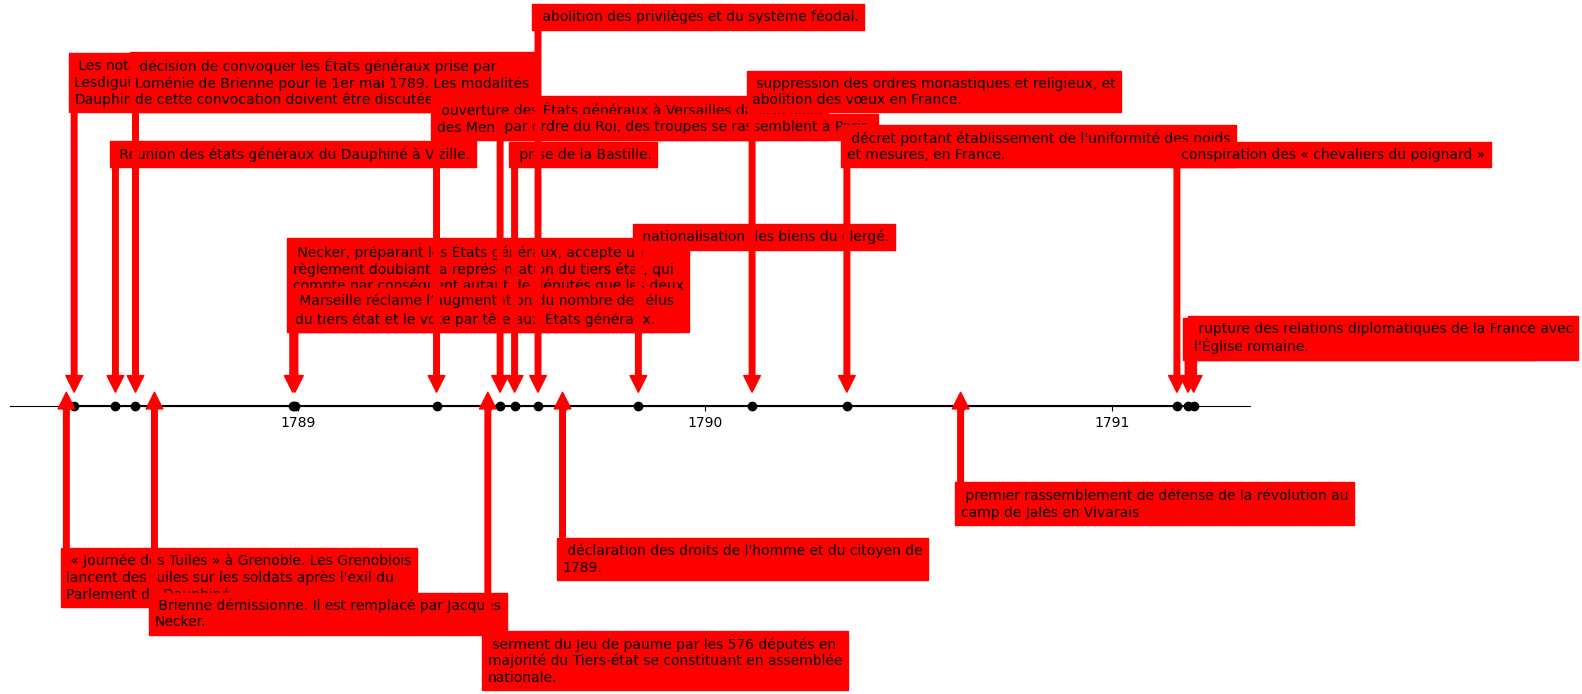

In [28]:
import matplotlib.pyplot as plt
from datetime import datetime
df3 = df2.head(20)
data = ["1788-06-07", "1788-06-14", "1788-07-21", "1788-08-08", "1788-08-25"]
ex1 = pd.Series(data)
print(type(ex1))
print(type(df3.datetimeParse))

# Créer la figure
fig, ax = plt.subplots(figsize=(16, 5))

# Ligne horizontale 
ax.plot(df3.datetimeParse, [0,]* len(df3), "-o", color="black")

# Limite y
ax.set_ylim(-7, 7)

# Ploter les ticks
ticks = pd.date_range(str(min(df3["datetimeParse"])), str(max(df3["datetimeParse"])), freq="YS")
theRange = range(int(min(df3["datetimeParse"]).year), int(max(df3["datetimeParse"]).year))
ax.set_xticks(ticks, theRange)
ax.set_xticklabels([d.year for d in ticks], rotation=90, ha='right')

# Merge x-axis & ligne horizontale
ax.spines["bottom"].set_position(("axes", 0.5))

for idx in range (len(df3)):
    dt, evenement, level  = df3["datetimeParse"][idx], df3["Evenement"][idx], df3["level"][idx]
    an =  ax.annotate(evenement
                , xy=(dt, 0.5)
                , xytext=(dt, level)
                , arrowprops=dict(color="red")
                , backgroundcolor="red"
                #, bbox=dict(xy=(0,0))
                , wrap = True
               )
    an._get_wrap_line_width = lambda : 400.
"""
for idx in range (len(df3)):
    dt, evenement, level  = df3["datetimeParse"][idx], df3["Evenement"][idx], df3["level"][idx]
    an = ax.text(dt, level *2,evenement, wrap=True

               )
    an._get_wrap_line_width = lambda : 300.
"""
ax.spines[["left", "top", "right"]].set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

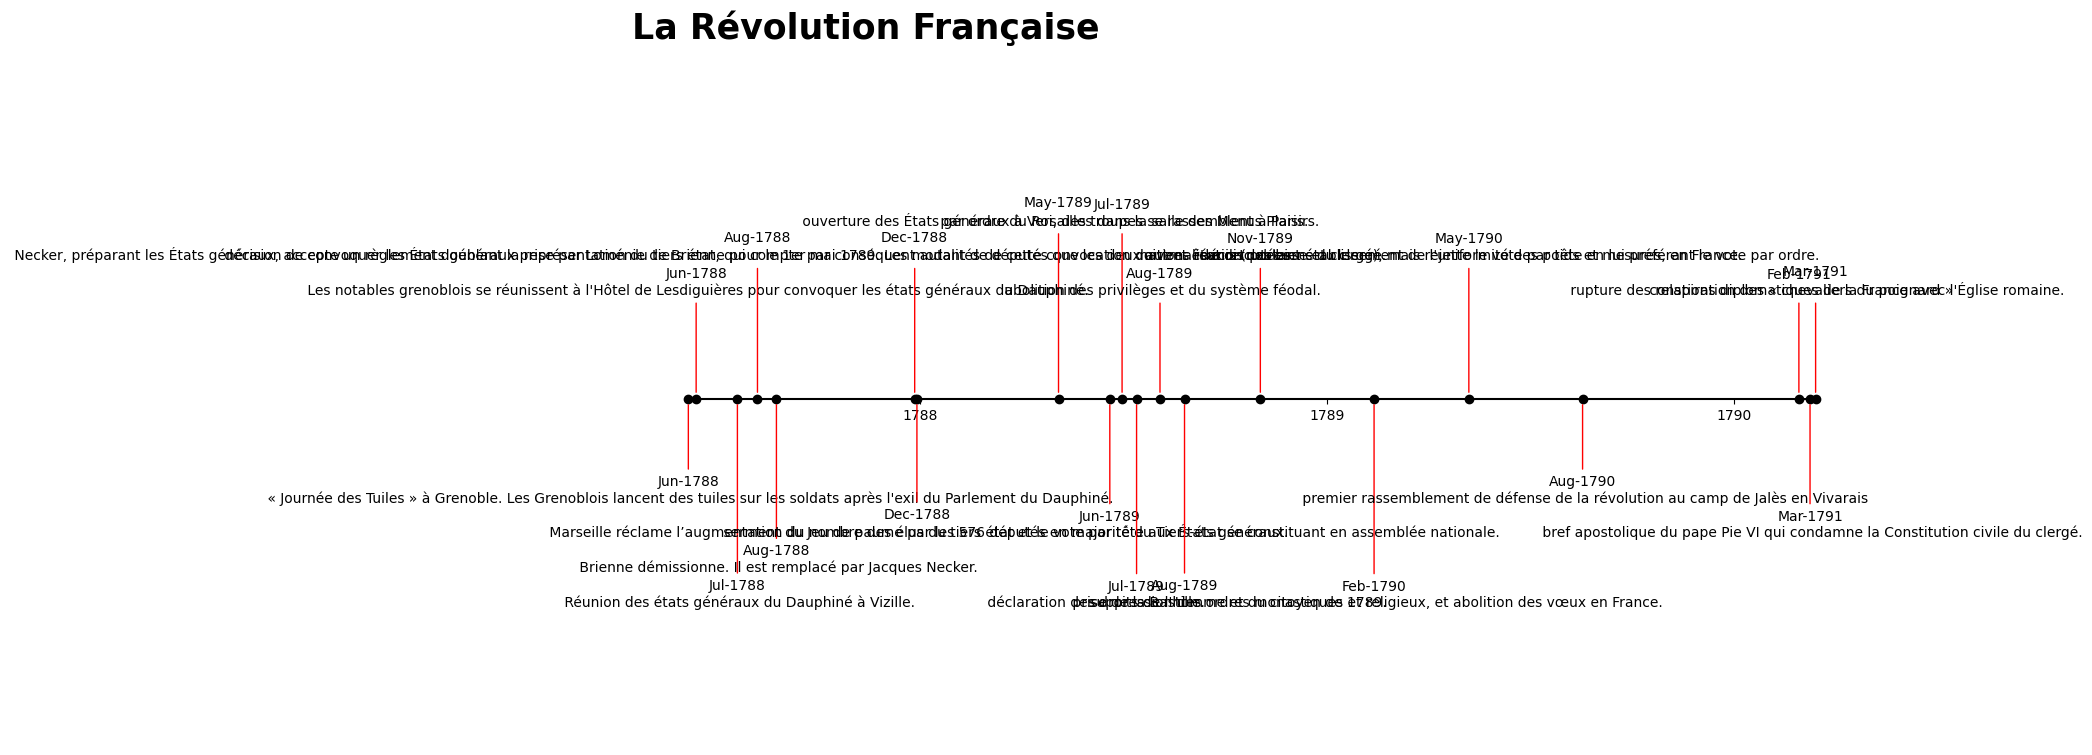

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(df2["datetimeParse"], [0,]* len(df2), "-o", color="black", markerfacecolor="white");
ax.plot(df2["datetimeParse"],  [0,]* len(df2), "-o", color="black");

#ax.set_xticks(pd.date_range("1788-06-07", "1791-03-15", freq="YS"), range(1788, 1791));
ax.set_xticks(pd.date_range("1788-06-07", "1791-03-15", freq="YS"), range(1788, 1791));
ax.set_ylim(-10,10);

for idx in range(len(df2)):
    dt, evenement, level = df2["datetimeParse"][idx], df2["Evenement"][idx], df2["level"][idx]
    dt_str = dt.strftime("%b-%Y")
    ax.annotate(dt_str + "\n" + evenement, xy=(dt, 0.1 if level>0 else -0.1)
                ,xytext=(dt, level)
                ,arrowprops=dict(arrowstyle="-",color="red", linewidth=1)
                ,ha="center" 
                
               );

ax.annotate("hellooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo", (1788,2), wrap=1, fontsize='x-small')
ax.spines[["left", "top", "right", "bottom"]].set_visible(False);
ax.spines[["bottom"]].set_position(("axes", 0.5));
ax.yaxis.set_visible(False);
ax.set_title("La Révolution Française", pad=10, loc="left", fontsize=25, fontweight="bold");
#plt.savefig('RevFr.png')
#plt.show()

Source : <br>
https://www.geeksforgeeks.org/web-scraping-from-wikipedia-using-python-a-complete-guide/ <br>

In [ ]:
2) Save data in file <br>
https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file

In [ ]:
3) Plot as a a timeline <br>
https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
https://coderzcolumn.com/tutorials/data-science/timeline-using-matplotlib